In [1]:
import httpimport

In [2]:
import sys
with httpimport.github_repo('MimaxSimm', 'trPL_Analysis', ref='master'):
    import trPL_importClass

/home/qrb/Documents/Scripts/trPL_Analysis/trPL_importClass.py:498: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel("Time [$\mu$s]", fontsize=axis_fontsize)
/home/qrb/Documents/Scripts/trPL_Analysis/trPL_importClass.py:503: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel("Time [$\mu$s]", fontsize=axis_fontsize)
/home/qrb/Documents/Scripts/trPL_Analysis/trPL_importClass.py:556: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel("Time [$\mu$s]", fontsize=axis_fontsize)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from os.path import isfile, join
from importlib import reload

In [7]:
# Encapsulation seems to hold, if done PROPERLY

trPLs = trPL_importClass.trPL_measurement_series(r"/home/qrb/Documents/DataOthers/20250820-Shengnan", BG = 1.42, thickness = 400e-9, TRPL_denoise = True, mode = "HySprint", retime = True, importPL=True)
trPLs.TRPLs_files

Lambda Laser set to: 7.050000e-07
Spot diameter set to: 2.720000e-04
Film thickness set to: 4.000000e-07
Beam dump ratio set to: 2.100000e-01
BG, Nc and Nv set to:1.42 2e+18 2e+18
['00-C1_50kHz-ND1-2.03uW-300s_0.25ns.dat', '01-C2_50kHz-ND1-2.03uW-300s_0.25ns.dat', '02-EA1_50kHz-ND1-2.03uW-300s_0.25ns.dat', '03-EA2_50kHz-ND1-2.03uW-300s_0.25ns.dat']


['00-C1_50kHz-ND1-2.03uW-300s_0.25ns.dat',
 '01-C2_50kHz-ND1-2.03uW-300s_0.25ns.dat',
 '02-EA1_50kHz-ND1-2.03uW-300s_0.25ns.dat',
 '03-EA2_50kHz-ND1-2.03uW-300s_0.25ns.dat']

In [24]:
# Encapsulation seems to hold, if done PROPERLY

trPLs2 = trPL_importClass.trPL_measurement_series(r"/home/qrb/Documents/DataOthers/20250721-ChiaraShengnan-Tinbased/Shengnan/Selected", BG = 1.42, thickness = 400e-9, TRPL_denoise = True, mode = "HySprint", retime = True, importPL=True)
trPLs2.TRPLs_files

Lambda Laser set to: 7.050000e-07
Spot diameter set to: 2.720000e-04
Film thickness set to: 4.000000e-07
Beam dump ratio set to: 2.100000e-01
BG, Nc and Nv set to:1.42 2e+18 2e+18
['00-C2_200kHz-ND3-8.13uW-30s_0.25ns.dat', '03-EA2_100kHz-ND1-4.06uW-300s_0.25ns.dat', '04-C1_100kHz-ND1-4.06uW-300s_0.25ns.dat', '05-EA1_100kHz-ND1-4.06uW-300s_0.25ns.dat']


['00-C2_200kHz-ND3-8.13uW-30s_0.25ns.dat',
 '03-EA2_100kHz-ND1-4.06uW-300s_0.25ns.dat',
 '04-C1_100kHz-ND1-4.06uW-300s_0.25ns.dat',
 '05-EA1_100kHz-ND1-4.06uW-300s_0.25ns.dat']

<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1055/2965149914.py:25: SyntaxWarning: invalid escape sequence '\m'
  a.set_xlabel("Time [$\mu$s]", fontsize=axis_fontsize)


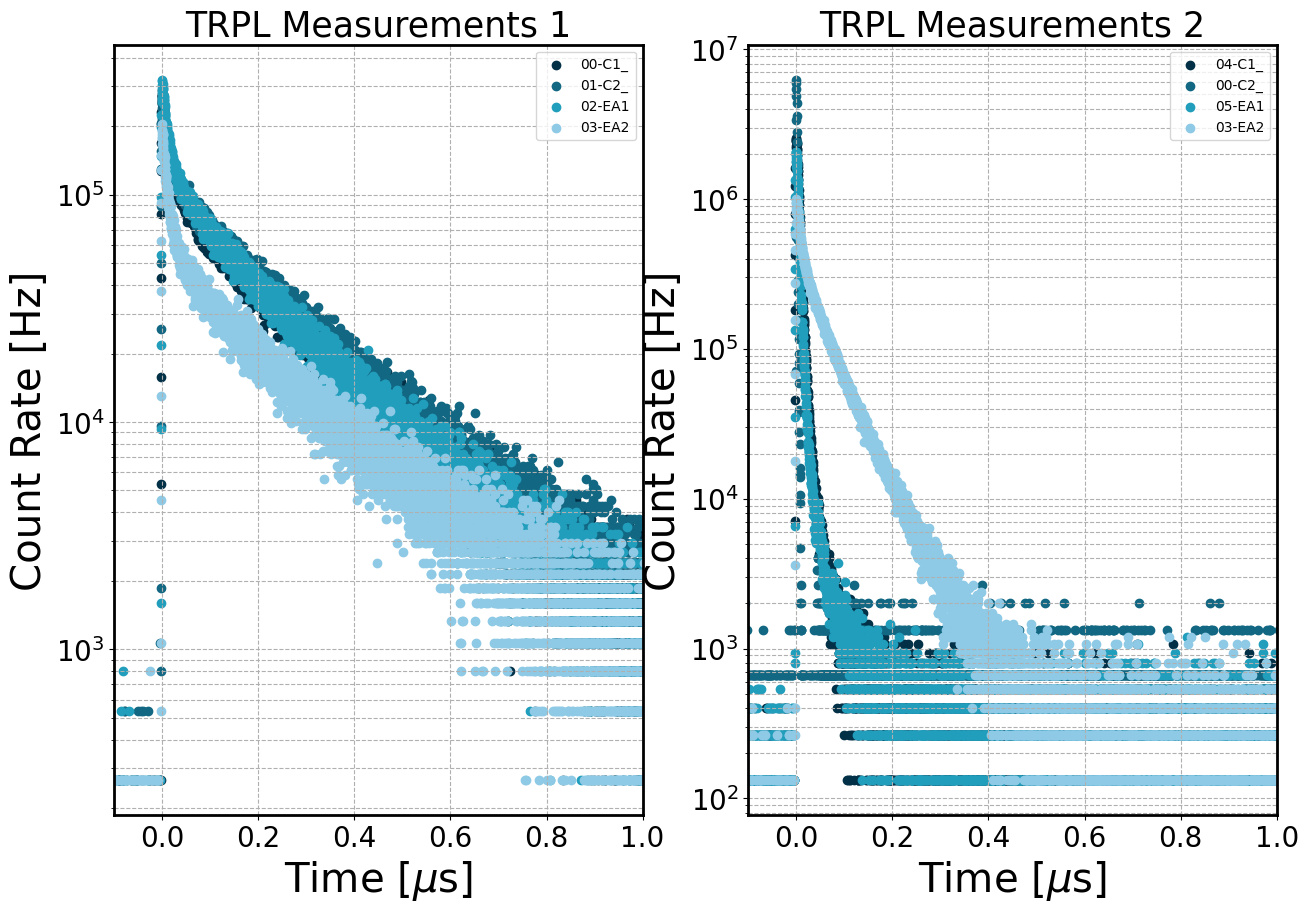

In [25]:
#Plot series
fig, ax = plt.subplots(1,2, figsize = (15,10))
idx_start = 3501
palette = ['#023047', '#126782', '#219EBC', '#8ECAE6', '#FFB703', '#FD9E02', '#FB8500', '#023047', '#126782', '#126782']

legend = ["10us", "100us", "1ms", "3ms", "10us"]

BG = []
selection = [2,0,3,1]
for i, (sPL) in enumerate(selection):
    ax[0].scatter(1e6*(trPLs.TRPLs_ts[:,i]), trPLs.TRPLs_subsMean[:,i], color = palette[i], label = trPLs.TRPLs_files[i][:6], alpha = 1)
    ax[1].scatter(1e6*(trPLs2.TRPLs_ts[:,sPL]), trPLs2.TRPLs_subsMean[:,sPL], color = palette[i], label = trPLs2.TRPLs_files[sPL][:6], alpha = 1)

ax[0].set_title('TRPL Measurements 1', fontsize=25)
ax[1].set_title('TRPL Measurements 2', fontsize=25)


for a in ax:
    a.set_xlim([-0.1,1])
    #a.set_ylim([1, 1e7])
    a.set_yscale("log")
    a.set_xscale("linear")
    axis_fontsize = 29
    a.set_ylabel("Count Rate [Hz]", fontsize=axis_fontsize) 
    a.set_xlabel("Time [$\mu$s]", fontsize=axis_fontsize) 
    a.legend()
    axisTicks_fontsize = 20
    a.tick_params(axis='x', labelsize=axisTicks_fontsize)
    a.tick_params(axis='y', labelsize=axisTicks_fontsize)

    a.grid(visible = True, which = 'both', linestyle = '--')

    w_frame = 2
    a.spines["bottom"].set_linewidth(w_frame)
    a.spines["top"].set_linewidth(w_frame)
    a.spines["left"].set_linewidth(w_frame)
    a.spines["right"].set_linewidth(w_frame)

Number of exponentials for fit used is = [12, 12, 12, 12]

1.30e+15
1.30e+15
1.30e+15
1.30e+15


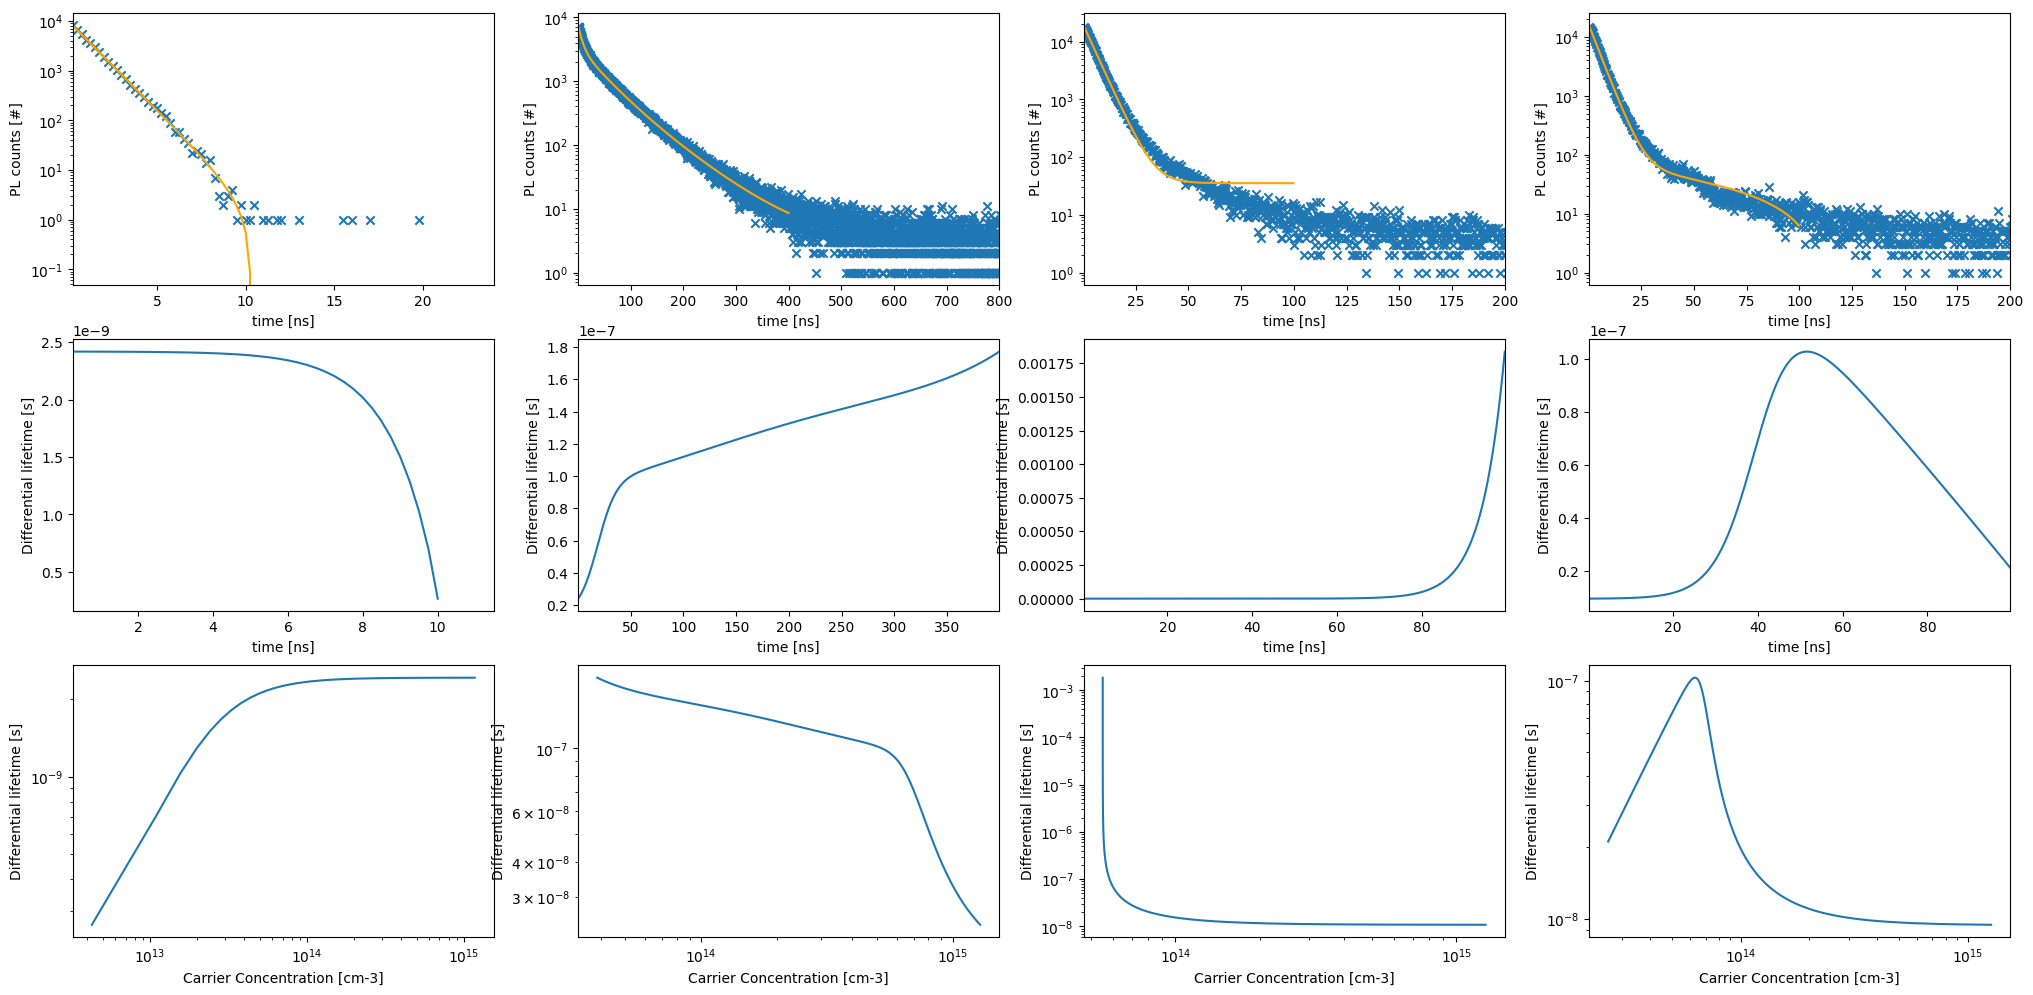

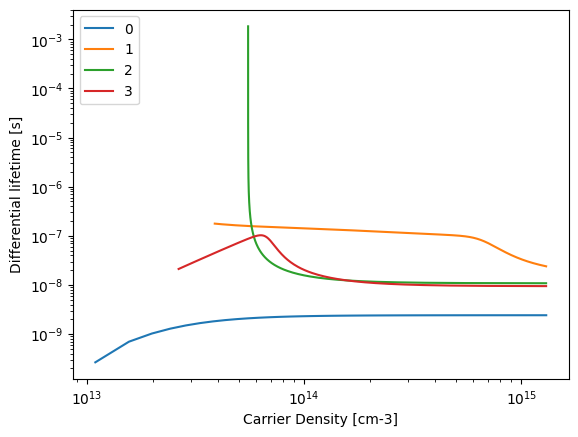

In [29]:
#Differential lifetimes
l = [12,400, 80,80]
n_exp = [12 for i in trPLs.n0s]

times2, densities2, taudiffs2 = trPLs2.fit_difflifetimes(n_exp=n_exp, l2=l)

Number of exponentials for fit used is = [8, 8, 8, 8]

1.30e+15
1.30e+15
1.30e+15
1.30e+15


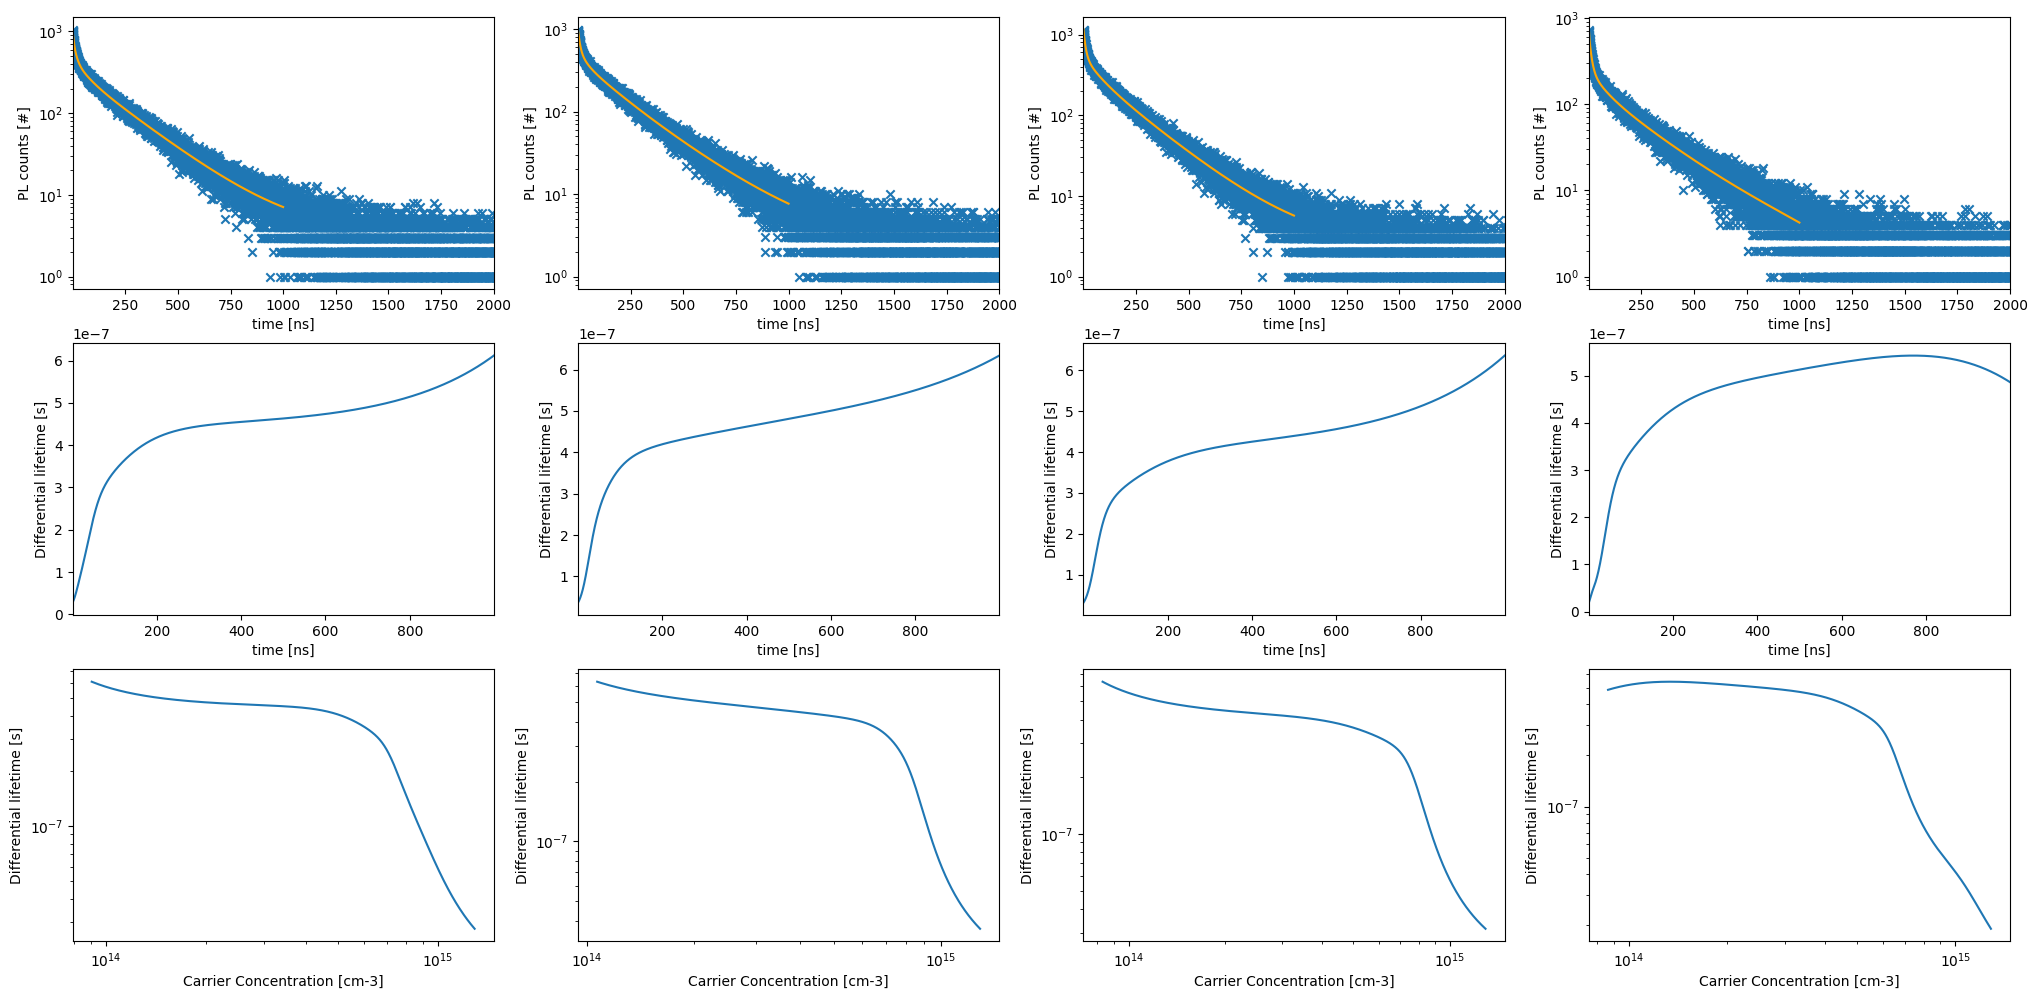

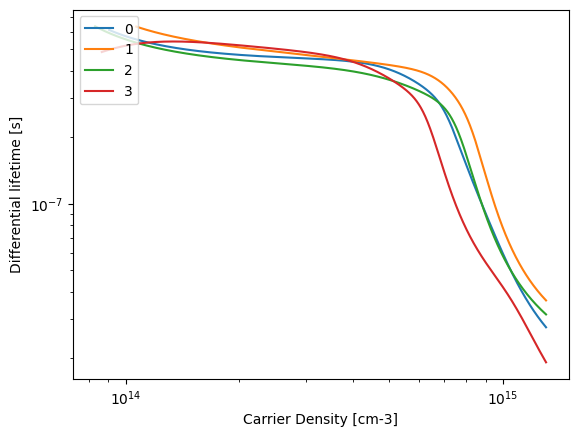

In [30]:
#Differential lifetimes
l = [1000 for i in range(4)]
n_exp = [8 for i in trPLs.n0s]

times1, densities1, taudiffs1 = trPLs.fit_difflifetimes(n_exp=n_exp, l2=l)

In [32]:
trPLs2.TRPL_savedata("./exampleSave.csv", selection=selection)

,time: 04-C1_100kHz-ND1-4.06uW-300s_0.25ns.dat,trPL denoised: 04-C1_100kHz-ND1-4.06uW-300s_0.25ns.dat,trPL normalised: 04-C1_100kHz-ND1-4.06uW-300s_0.25ns.dat,trPL raw: 04-C1_100kHz-ND1-4.06uW-300s_0.25ns.dat,time: 00-C2_200kHz-ND3-8.13uW-30s_0.25ns.dat,trPL denoised: 00-C2_200kHz-ND3-8.13uW-30s_0.25ns.dat,trPL normalised: 00-C2_200kHz-ND3-8.13uW-30s_0.25ns.dat,trPL raw: 00-C2_200kHz-ND3-8.13uW-30s_0.25ns.dat,time: 05-EA1_100kHz-ND1-4.06uW-300s_0.25ns.dat,trPL denoised: 05-EA1_100kHz-ND1-4.06uW-300s_0.25ns.dat,trPL normalised: 05-EA1_100kHz-ND1-4.06uW-300s_0.25ns.dat,trPL raw: 05-EA1_100kHz-ND1-4.06uW-300s_0.25ns.dat,time: 03-EA2_100kHz-ND1-4.06uW-300s_0.25ns.dat,trPL denoised: 03-EA2_100kHz-ND1-4.06uW-300s_0.25ns.dat,trPL normalised: 03-EA2_100kHz-ND1-4.06uW-300s_0.25ns.dat,trPL raw: 03-EA2_100kHz-ND1-4.06uW-300s_0.25ns.dat
0,-2.657500e-07,0.000000,0.000000,1,-2.637500e-07,0.0,0.0,0,-2.657500e-07,0.000000,0.000000,0,-2.657500e-07,0.000000,0.000000,2
1,-2.655000e-07,-133.333333,-0.000052,0,-2.635000e-07,0.0,0.0,0,-2.655000e-07,133.333333,0.000064,1,-2.655000e-07,266.666667,0.000267,4
2,-2.652500e-07,133.333333,0.000052,2,-2.632500e-07,0.0,0.0,0,-2.652500e-07,133.333333,0.000064,1,-2.652500e-07,533.333333,0.000533,6
3,-2.650000e-07,0.000000,0.000000,1,-2.630000e-07,0.0,0.0,0,-2.650000e-07,0.000000,0.000000,0,-2.650000e-07,133.333333,0.000133,3
4,-2.647500e-07,-133.333333,-0.000052,0,-2.627500e-07,0.0,0.0,0,-2.647500e-07,400.000000,0.000193,3,-2.647500e-07,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,7.925000e-06,0.000000,0.000000,1,7.927000e-06,0.0,0.0,0,7.925000e-06,133.333333,0.000064,1,7.925000e-06,0.000000,0.000000,2
32764,7.925250e-06,133.333333,0.000052,2,7.927250e-06,0.0,0.0,0,7.925250e-06,133.333333,0.000064,1,7.925250e-06,-133.333333,-0.000133,1
32765,7.925500e-06,-133.333333,-0.000052,0,7.927500e-06,0.0,0.0,0,7.925500e-06,266.666667,0.000129,2,7.925500e-06,-266.666667,-0.000267,0
32766,7.925750e-06,0.000000,0.000000,1,7.927750e-06,0.0,0.0,0,7.925750e-06,133.333333,0.000064,1,7.925750e-06,0.000000,0.000000,2


In [33]:
trPLs.TRPL_savedata("./exampleSave.csv")

,time: 00-C1_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL denoised: 00-C1_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL normalised: 00-C1_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL raw: 00-C1_50kHz-ND1-2.03uW-300s_0.25ns.dat,time: 01-C2_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL denoised: 01-C2_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL normalised: 01-C2_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL raw: 01-C2_50kHz-ND1-2.03uW-300s_0.25ns.dat,time: 02-EA1_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL denoised: 02-EA1_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL normalised: 02-EA1_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL raw: 02-EA1_50kHz-ND1-2.03uW-300s_0.25ns.dat,time: 03-EA2_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL denoised: 03-EA2_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL normalised: 03-EA2_50kHz-ND1-2.03uW-300s_0.25ns.dat,trPL raw: 03-EA2_50kHz-ND1-2.03uW-300s_0.25ns.dat
0,-2.657500e-07,0.000000,0.00000,2,-2.657500e-07,0.000000,0.000000,1,-2.657500e-07,0.000000,0.000000,1,-2.657500e-07,0.000000,0.000000,1
1,-2.655000e-07,-533.333333,-0.00184,0,-2.655000e-07,-266.666667,-0.000999,0,-2.655000e-07,0.000000,0.000000,1,-2.655000e-07,-266.666667,-0.001309,0
2,-2.652500e-07,-533.333333,-0.00184,0,-2.652500e-07,-266.666667,-0.000999,0,-2.652500e-07,266.666667,0.000832,2,-2.652500e-07,-266.666667,-0.001309,0
3,-2.650000e-07,0.000000,0.00000,2,-2.650000e-07,-266.666667,-0.000999,0,-2.650000e-07,-266.666667,-0.000832,0,-2.650000e-07,-266.666667,-0.001309,0
4,-2.647500e-07,-533.333333,-0.00184,0,-2.647500e-07,0.000000,0.000000,1,-2.647500e-07,0.000000,0.000000,1,-2.647500e-07,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,7.925000e-06,-533.333333,-0.00184,0,7.925000e-06,-266.666667,-0.000999,0,7.925000e-06,266.666667,0.000832,2,7.925000e-06,-266.666667,-0.001309,0
32764,7.925250e-06,-266.666667,-0.00092,1,7.925250e-06,0.000000,0.000000,1,7.925250e-06,-266.666667,-0.000832,0,7.925250e-06,-266.666667,-0.001309,0
32765,7.925500e-06,-266.666667,-0.00092,1,7.925500e-06,-266.666667,-0.000999,0,7.925500e-06,-266.666667,-0.000832,0,7.925500e-06,-266.666667,-0.001309,0
32766,7.925750e-06,0.000000,0.00000,2,7.925750e-06,0.000000,0.000000,1,7.925750e-06,266.666667,0.000832,2,7.925750e-06,-266.666667,-0.001309,0


In [35]:
trPLs.diff_savedata("./taudiff_8exponenents.csv")

,time: 00-C1_50kHz-ND1-2.03uW-300s_0.25ns.dat,density: 00-C1_50kHz-ND1-2.03uW-300s_0.25ns.dat,qfls: 00-C1_50kHz-ND1-2.03uW-300s_0.25ns.dat,tau_diff: 00-C1_50kHz-ND1-2.03uW-300s_0.25ns.dat,time: 01-C2_50kHz-ND1-2.03uW-300s_0.25ns.dat,density: 01-C2_50kHz-ND1-2.03uW-300s_0.25ns.dat,qfls: 01-C2_50kHz-ND1-2.03uW-300s_0.25ns.dat,tau_diff: 01-C2_50kHz-ND1-2.03uW-300s_0.25ns.dat,time: 02-EA1_50kHz-ND1-2.03uW-300s_0.25ns.dat,density: 02-EA1_50kHz-ND1-2.03uW-300s_0.25ns.dat,qfls: 02-EA1_50kHz-ND1-2.03uW-300s_0.25ns.dat,tau_diff: 02-EA1_50kHz-ND1-2.03uW-300s_0.25ns.dat,time: 03-EA2_50kHz-ND1-2.03uW-300s_0.25ns.dat,density: 03-EA2_50kHz-ND1-2.03uW-300s_0.25ns.dat,qfls: 03-EA2_50kHz-ND1-2.03uW-300s_0.25ns.dat,tau_diff: 03-EA2_50kHz-ND1-2.03uW-300s_0.25ns.dat
0,2.500000e-10,1.301875e+15,1.013525,2.754984e-08,2.500000e-10,1.301875e+15,1.013525,3.645944e-08,2.500000e-10,1.301875e+15,1.013525,3.150471e-08,2.500000e-10,1.301875e+15,1.013525,1.911743e-08
1,5.000000e-10,1.290114e+15,1.013022,2.807749e-08,5.000000e-10,1.292978e+15,1.013145,3.691623e-08,5.000000e-10,1.291585e+15,1.013085,3.189790e-08,5.000000e-10,1.284961e+15,1.012800,1.987897e-08
2,7.500000e-10,1.278678e+15,1.012529,2.861785e-08,7.500000e-10,1.284252e+15,1.012770,3.738259e-08,7.500000e-10,1.281501e+15,1.012651,3.229939e-08,7.500000e-10,1.268902e+15,1.012104,2.065368e-08
3,1.000000e-09,1.267556e+15,1.012045,2.917098e-08,1.000000e-09,1.275692e+15,1.012399,3.785866e-08,1.000000e-09,1.271621e+15,1.012222,3.270933e-08,1.000000e-09,1.253635e+15,1.011433,2.143957e-08
4,1.250000e-09,1.256740e+15,1.011570,2.973693e-08,1.250000e-09,1.267295e+15,1.012033,3.834458e-08,1.250000e-09,1.261939e+15,1.011799,3.312784e-08,1.250000e-09,1.239102e+15,1.010787,2.223459e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,9.985000e-07,9.066034e+13,0.865915,6.111458e-07,9.985000e-07,1.069172e+14,0.875052,6.332068e-07,9.985000e-07,8.317751e+13,0.861142,6.347956e-07,9.985000e-07,8.667438e+13,0.863424,4.868082e-07
3994,9.987500e-07,9.062326e+13,0.865892,6.113292e-07,9.987500e-07,1.068750e+14,0.875030,6.333490e-07,9.987500e-07,8.314476e+13,0.861121,6.350243e-07,9.987500e-07,8.662988e+13,0.863395,4.866651e-07
3995,9.990000e-07,9.058620e+13,0.865869,6.115129e-07,9.990000e-07,1.068329e+14,0.875008,6.334914e-07,9.990000e-07,8.311204e+13,0.861099,6.352533e-07,9.990000e-07,8.658539e+13,0.863367,4.865217e-07
3996,9.992500e-07,9.054918e+13,0.865847,6.116967e-07,9.992500e-07,1.067907e+14,0.874987,6.336339e-07,9.992500e-07,8.307933e+13,0.861077,6.354826e-07,9.992500e-07,8.654091e+13,0.863339,4.863782e-07
